# Exploratory Data Analysis with Titanic dataset

In [1]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling Missing Values

In [10]:
miss_val = list(df.isna().sum())
# then we create a list of columns and their missing values 
# as inner list to a separate list

lst= []
i=0
for col in df.columns:
    l = [col,miss_val[i]]
    lst.append(l)
    i+=1
    
miss_val_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])


In [11]:
miss_val_df[miss_val_df['Missing_Values']>0].sort_values(by='Missing_Values',
ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,Cabin,687
1,Age,177
2,Embarked,2


In [12]:
round((df.isnull().sum()/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

As we can see from the above result that Cabin has 77% null values 
and Age has 19.87% and Embarked has 0.22% of null values.

In [13]:
 df['Age'].mean()

29.69911764705882

In [14]:
df['Age'].median()

28.0

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'].isnull().sum()

0

In [16]:
df['Cabin'].isnull().sum()

687

In [17]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [18]:
df['Cabin'].mode()[0]

'B96 B98'

In [19]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Cabin'].isnull().sum()

0

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above we can see * 38.3% people are survived * More number 
of people were actually in 3rd class * 50% of passengers were in
between the age of 20 to 38

## Survived Column

In [22]:
died = (df["Survived"] == 0).sum()
print("Died ",died)
survived= (df["Survived"] == 1).sum()
print("Survived ",survived)

Died  549
Survived  342


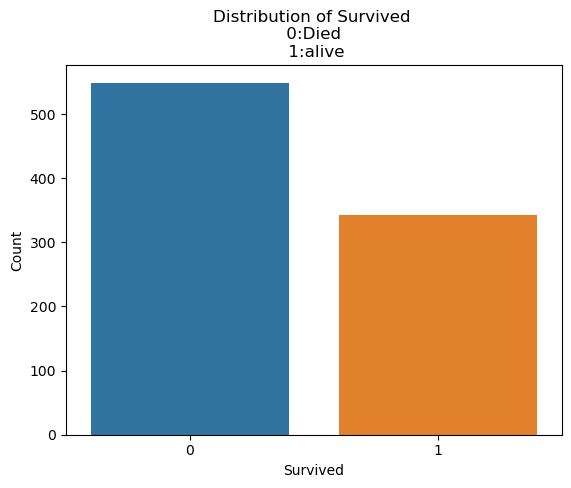

In [23]:
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived \n 0:Died \n 1:alive')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [24]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

[Text(0.5, 1.0, 'Number of alive and death in sex columns')]

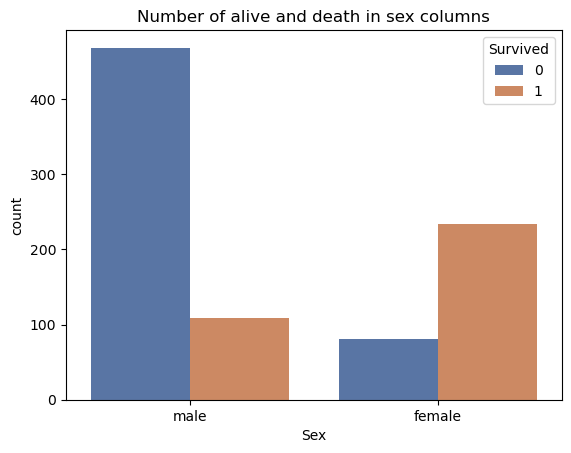

In [25]:
sns.countplot(data=df,x='Sex',hue='Survived',palette='deep').set(
title='Number of alive and death in sex columns')

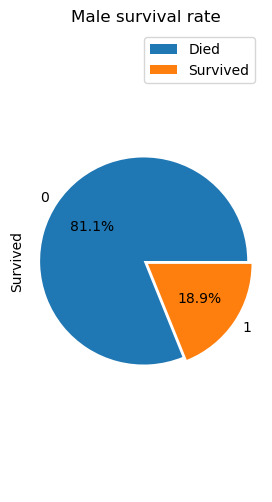

In [27]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Died","Survived"])
plt.title("Male survival rate")
plt.show()

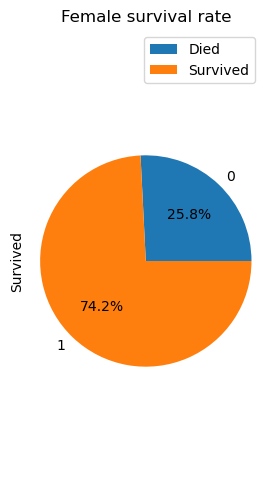

In [28]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(3, 6))
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Died","Survived"])
plt.show()


The above 2 plots says the females were given more priority than male in the survival process

## Pclass vs Survived

In [29]:
pd.crosstab(df.Pclass, df.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass', ylabel='count'>

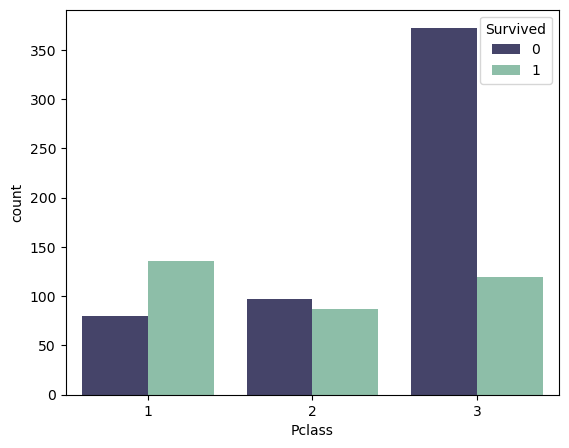

In [30]:
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = df, palette=["#3f3e6fd1","#85c6a9"], ax = ax1)

The first class has the largest number of survivors and the proportion of
survivors within the class is the largest. Third-class had the highest number
of drowned passengers, and most of the third-class passengers drowned.

[3 1 2]


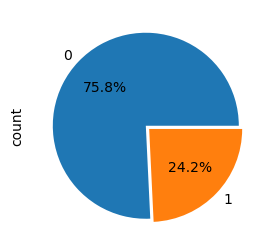

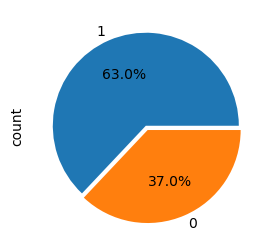

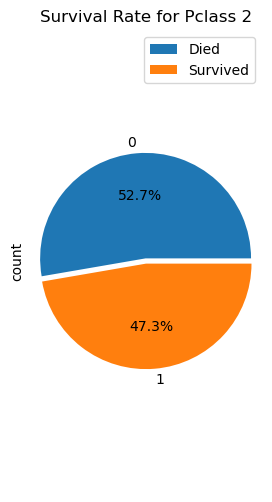

In [36]:
values = df['Pclass'].unique()
print(values)

# Plotting pie charts for each Pclass
for pclass in values:
    pclass_data = df[df['Pclass'] == pclass].Survived.value_counts()
    plt.figure()
    pclass_data.plot(kind='pie', figsize=(3, 6), explode=[0, 0.05], autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Died", "Survived"])
plt.title(f"Survival Rate for Pclass {pclass}")
plt.show()


C:\Users\Ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_24436\201045091.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


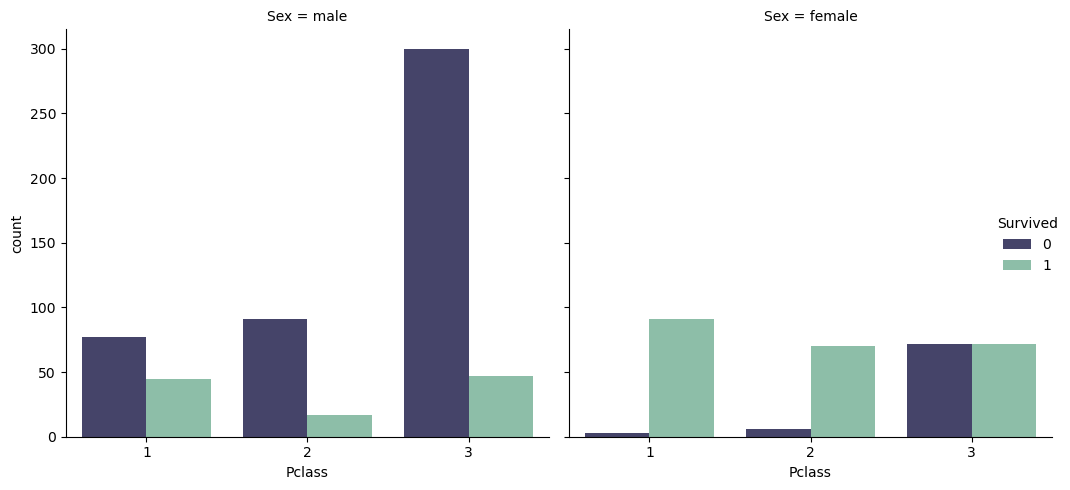

In [39]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data =
df,palette=["#3f3e6fd1", "#85c6a9"] )
plt.tight_layout()

Most of the male passengers of the first class drowned, and the female almost all survived. In the
third class half of the female survived.


Text(0, 0.5, 'Survival Rate')

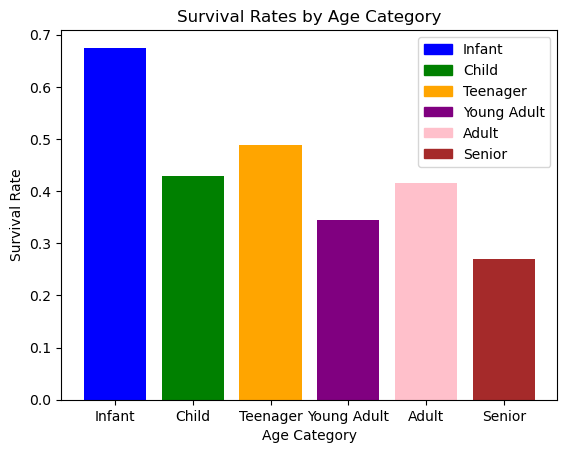

In [41]:
# Define cut points and label names
cut_points = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
df['Age_categories'] = pd.cut(df['Age'], bins=cut_points, labels=label_names,right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')

## Analysis on Parch, Embarked and SibSp

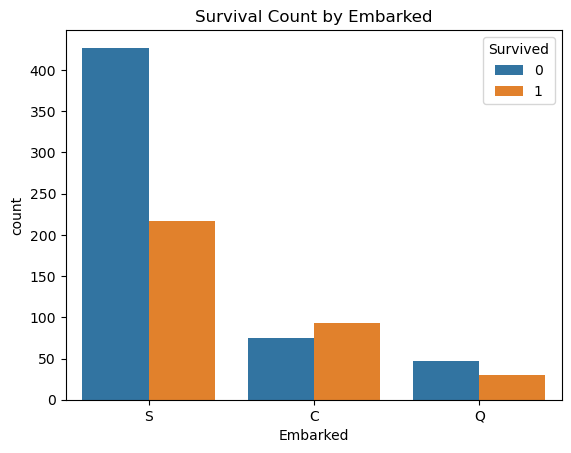

In [42]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked')
plt.show()

C:\Users\Ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


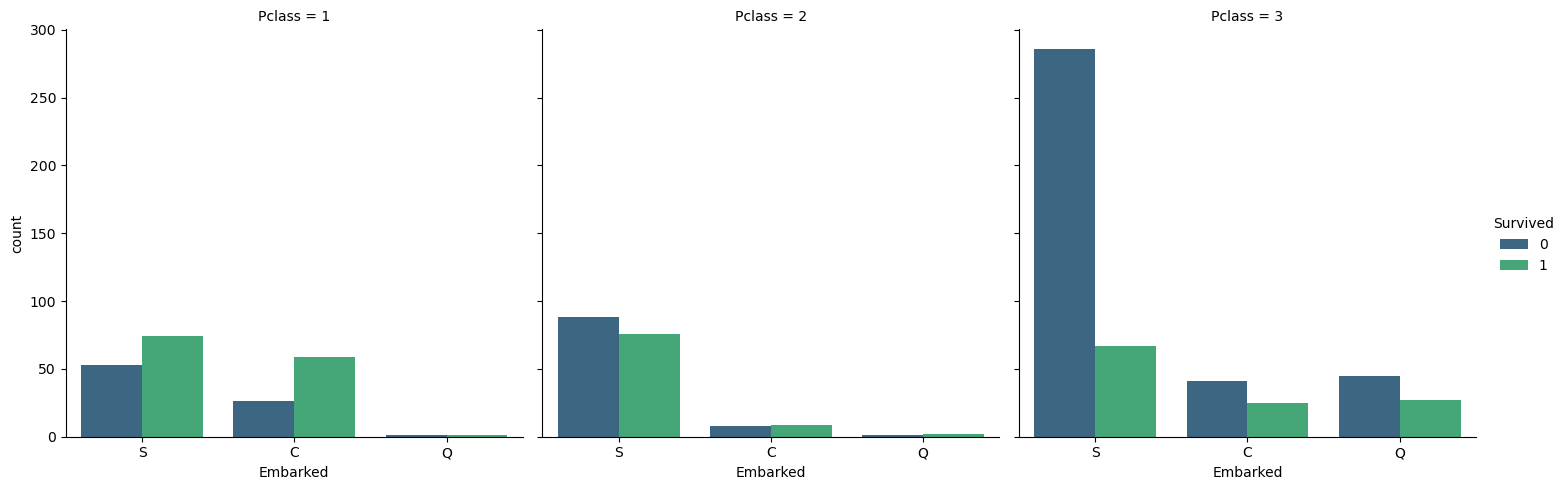

In [43]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df,palette='viridis')

<Axes: title={'center': 'Distribution of Parch'}, ylabel='count'>

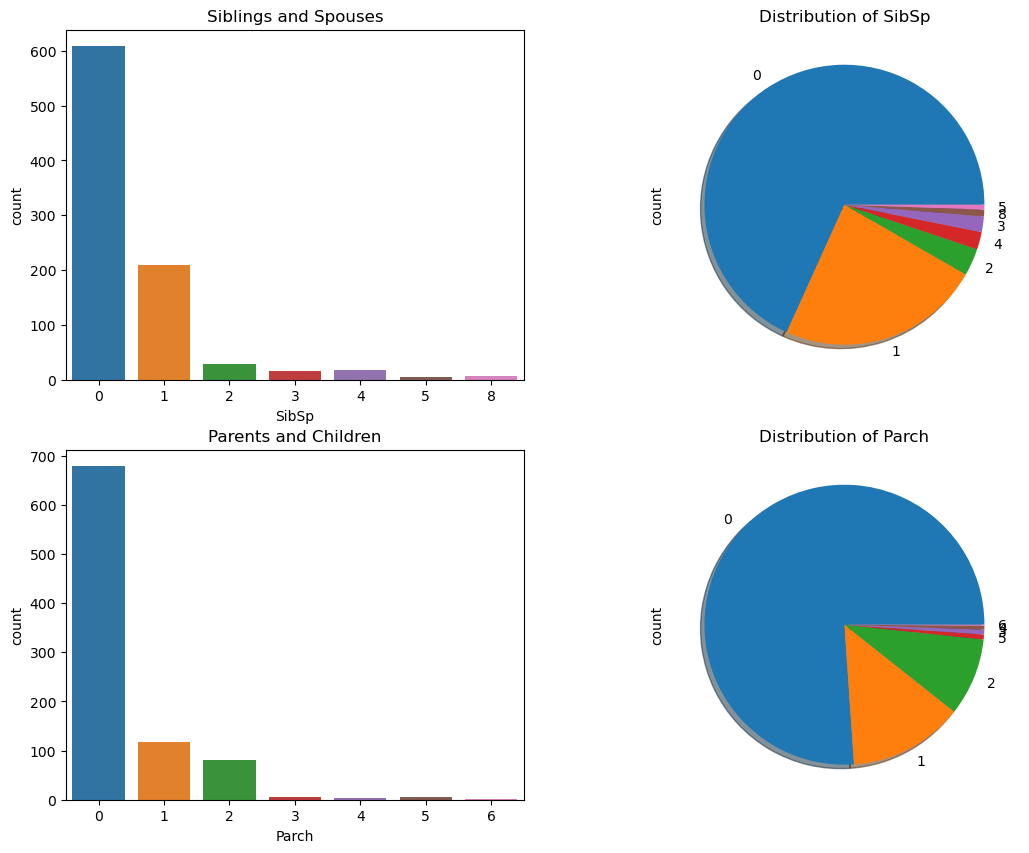

In [44]:
fig6, ax6 = plt.subplots(2, 2, figsize=(13, 10))

# SibSp
sns.countplot(data=df, x="SibSp", ax=ax6[0, 0]).set_title("Siblings and Spouses")
df["SibSp"].value_counts().plot.pie(ax=ax6[0, 1], shadow=True,title="Distribution of SibSp")
                                                          
# Parch
sns.countplot(data=df, x="Parch", ax=ax6[1, 0]).set_title("Parents and Children")
df["Parch"].value_counts().plot.pie(ax=ax6[1, 1], shadow=True,title="Distribution of Parch")


## Fare Column

In [46]:
max_fare, min_fare = df["Fare"].max(), df["Fare"].min()
print(f"Number of passengers who paid ${min_fare}:- ", df[df["Fare"] == min_fare].shape[0])
print(f"Number of passengers who paid ${max_fare}:- ", df[df["Fare"] == max_fare].shape[0])
print(f"Fare given by maximum number of passengers: $", list(dict(df["Fare"].value_counts()).keys())[0])

Number of passengers who paid $0.0:-  15
Number of passengers who paid $512.3292:-  3
Fare given by maximum number of passengers: $ 8.05


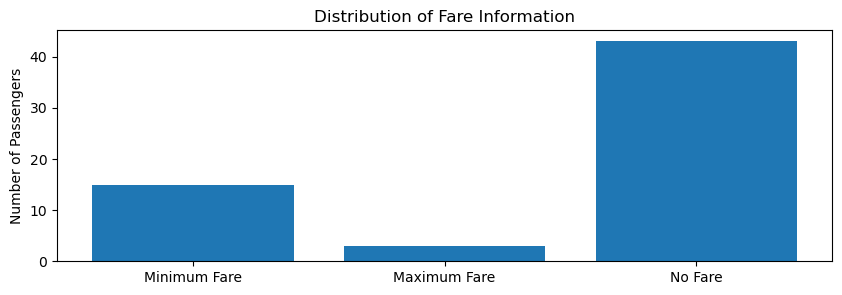

In [47]:
# Count the number of passengers who paid the maximum and minimum fare
passengers_min_fare = df[df["Fare"] == min_fare].shape[0]
passengers_max_fare = df[df["Fare"] == max_fare].shape[0]
fig, ax = plt.subplots(figsize=(10, 3))

# Plotting the bars
ax.bar(["Minimum Fare", "Maximum Fare", "No Fare"], [passengers_min_fare,passengers_max_fare, df["Fare"].value_counts().max()])

# Adding labels and title
ax.set_ylabel("Number of Passengers")
ax.set_title("Distribution of Fare Information")
plt.show()

<Axes: xlabel='Fare', ylabel='Survived'>

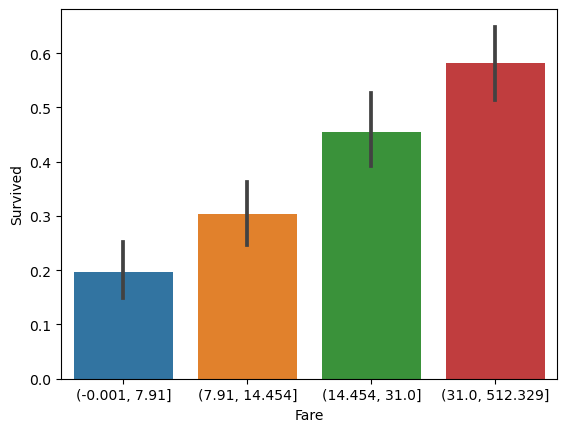

In [48]:
df['Fare'] = pd.qcut(df['Fare'], 4)
sns.barplot(x ='Fare', y ='Survived',
data = df)

In [49]:
 df[df['Fare'] == min(df['Fare'] )]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,"(-0.001, 7.91]",B96 B98,S,Young Adult
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,"(-0.001, 7.91]",B96 B98,S,Teenager
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,"(-0.001, 7.91]",B96 B98,C,Young Adult
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,"(-0.001, 7.91]",B96 B98,C,Young Adult
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,"(-0.001, 7.91]",B96 B98,Q,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.000000,0,0,349212,"(-0.001, 7.91]",B96 B98,S,Young Adult
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,"(-0.001, 7.91]",B96 B98,S,Young Adult
881,882,0,3,"Markun, Mr. Johann",male,33.000000,0,0,349257,"(-0.001, 7.91]",B96 B98,S,Young Adult
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,"(-0.001, 7.91]",B96 B98,S,Young Adult


In [50]:
df[df["Fare"] == min_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories


## Age Column

C:\Users\Ankit\AppData\Local\Temp\ipykernel_24436\406220102.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)


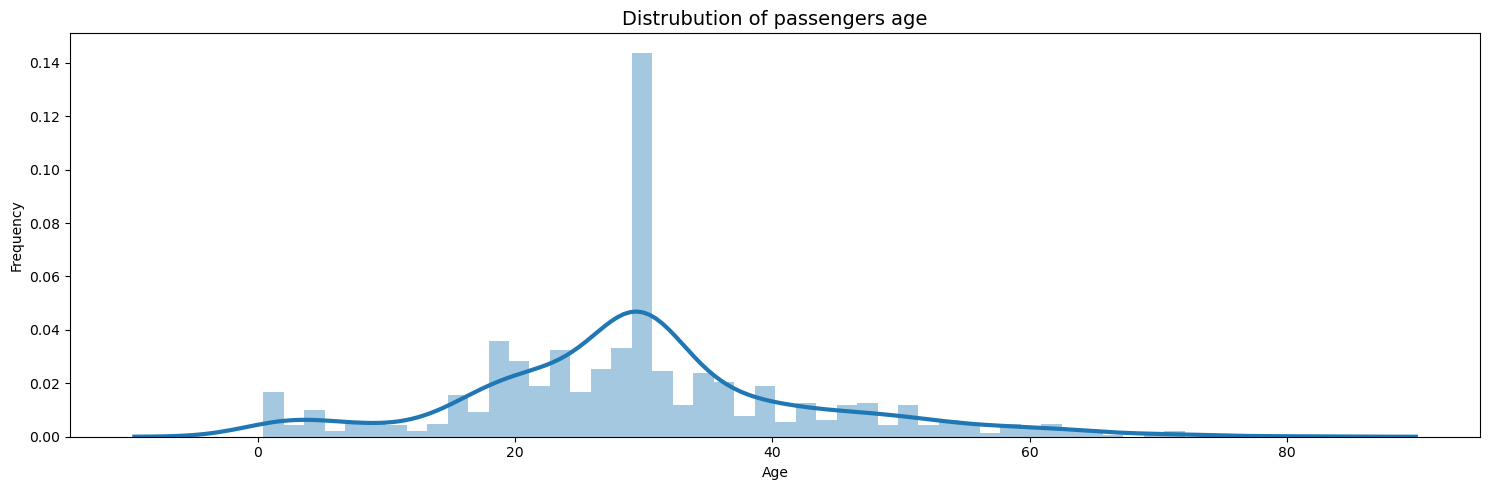

In [51]:
plt.figure(figsize=(15, 5))
sns.distplot(df[(df["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()

C:\Users\Ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


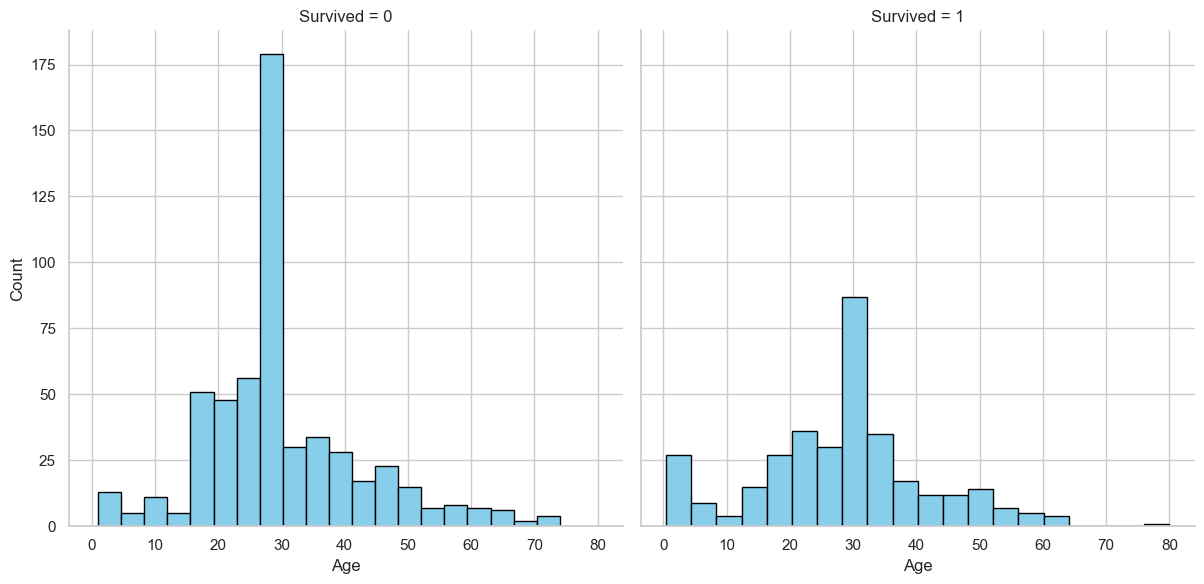

In [52]:
sns.set(style="whitegrid")

# Create a FacetGrid with Seaborn
g = sns.FacetGrid(df, col="Survived", height=6)
g.map(plt.hist, 'Age', bins=20, color='skyblue', edgecolor='black')

# Set labels and title
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template='Survived = {col_name}')
plt.show()

In [53]:
age = pd.DataFrame(df['Age'].describe())
age.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.699118,13.002015,0.42,22.0,29.699118,35.0,80.0


In [54]:
pd.DataFrame(df.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.415100,12.457370,1.00,23.0,29.699118,35.0,74.0
1,342.0,28.549778,13.772498,0.42,21.0,29.699118,35.0,80.0


In [55]:
df[df['Age'] == min(df['Age'] )]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,"(7.91, 14.454]",B96 B98,C,Infant


In [56]:
df[df['Age'] == max(df['Age'] )]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,"(14.454, 31.0]",A23,S,Senior


# Model Buliding
### Using Logistic Regression 
### Survival Prediction Model Based on Age

In [57]:
lr = LogisticRegression()

In [58]:
X_Age = df[['Age']].values
y = df['Survived'].values
lr.fit(X_Age,y)
y_predict = lr.predict(X_Age)
print(y_predict[:10])
age_accuracy = (y == y_predict.round()).mean()
print("Age Accuracy:", age_accuracy)

[0 0 0 0 0 0 0 0 0 0]
Age Accuracy: 0.6161616161616161


### Survival Prediction Model Based on Pclass

In [59]:
X_sex = pd.get_dummies(df['Pclass']).values
y = df['Survived'].values
lr.fit(X_sex, y)
y_predict = lr.predict(X_sex)
print(y_predict[:10])
pclass_accuracy = (y == y_predict.round()).mean()
print("Pclas Accuracy:", pclass_accuracy )

[0 1 0 1 0 0 1 0 0 0]
Pclas Accuracy: 0.6790123456790124


### Survival Prediction Model Based on Sex

In [60]:
X_sex = pd.get_dummies(df['Sex']).values
y = df['Survived'].values
lr.fit(X_sex, y)
y_predict = lr.predict(X_sex)
print(y_predict[:10])
sex_accuracy = (y == y_predict.round()).mean()
print("Sex Accuracy:", sex_accuracy)

[0 1 1 1 0 0 0 0 1 1]
Sex Accuracy: 0.7867564534231201


In [61]:
pd.DataFrame([age_accuracy,pclass_accuracy,sex_accuracy],index=["age_accuracy","pclass_accuracy","sex_accuracy"],columns=['Accuracy'])


,Accuracy
age_accuracy,0.616162
pclass_accuracy,0.679012
sex_accuracy,0.786756


The gender of passenger is a strong predictor and purely predciting based on gender, the model
accuracy increased to 78%

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [63]:
df["Sex"]=le.fit_transform(df['Sex'])
df["Cabin"]=le.fit_transform(df['Cabin'])

## Machine Learning Algorithms
### Logistic Regression

In [64]:
lr = LogisticRegression()

In [65]:
columns = ['Pclass', 'Sex','Age','Cabin','SibSp', 'Parch']
X = df[columns]
Y = df["Survived"]
lr.fit(X,Y)

LogisticRegression()

In [66]:
columns = ['Pclass', 'Sex','Age','Cabin','SibSp', 'Parch']
all_X = df[columns]
all_y = df['Survived']
train_X, test_X, train_y, test_y = train_test_split(
all_X, all_y, test_size=0.2,random_state=0)

In [67]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [68]:
accuracy = accuracy_score(test_y, predictions)

In [69]:
predictions = lr.predict(test_X)
lr_accuracy = accuracy_score(test_y, predictions)
print("Lr_accuracy : ", lr_accuracy)

Lr_accuracy :  0.8212290502793296


In [70]:
conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived','Died']])


,Survived,Died
Survived,95,15
Died,17,52


In [71]:
X=df[['Pclass', 'Sex','Age','Cabin','SibSp', 'Parch']].values # Taking all the␣numerical values
y = df['Survived'].values
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [72]:
predictions = knn.predict(test_X)
knn_accuracy = accuracy_score(test_y, predictions)
print("Knn_accuracy : ", knn_accuracy)


Knn_accuracy :  0.8603351955307262


C:\Users\Ankit\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [73]:
X=df[['Pclass', 'Sex','Age','Cabin','SibSp', 'Parch']].values # Taking all the␣numerical values
y = df['Survived'].values
rfc = RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier()

In [75]:
predictions = rfc.predict(test_X)
rfc_accuracy = accuracy_score(test_y, predictions)
print("Rfc_accuracy : ", rfc_accuracy)

Rfc_accuracy :  0.9553072625698324


C:\Users\Ankit\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [76]:
results=pd.DataFrame({'Model':['LogisticRegression','Random Forest Classfier','KNN'],
'Accuracy Score':[lr_accuracy,rfc_accuracy,knn_accuracy]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df


,Accuracy Score
Model,
Random Forest Classfier,0.955307
KNN,0.860335
LogisticRegression,0.821229


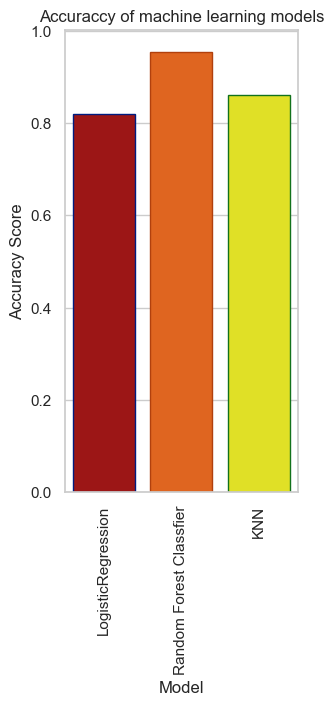

In [77]:
plt.subplots(figsize=(3,6))
sns.barplot(x="Model", y="Accuracy Score",data=results,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of machine learning models')
plt.show()